In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import numpy as np
import os

# define some random data that emulates your indeded code:
NCURVES = 8
curves = [i for i in range(NCURVES)]
values = range(NCURVES)
blues = plt.get_cmap('Blues_r') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=blues)

NCURVES = 10
curves = [i for i in range(NCURVES)]
values = range(NCURVES)
blues = plt.get_cmap('Greens_r') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap_g = cmx.ScalarMappable(norm=cNorm, cmap=blues)

NCURVES = 10
curves = [i for i in range(NCURVES)]
values = range(NCURVES)
reds = plt.get_cmap('Reds_r') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap_r = cmx.ScalarMappable(norm=cNorm, cmap=reds)

params = {
    "text.usetex": True,
    "font.family": "serif",
    "legend.fontsize": 20,
    "axes.labelsize": 22,
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "lines.linewidth": 3,
    "lines.markeredgewidth": 0.8,
    "lines.markersize": 0.1,
    "lines.marker": "o",
    "patch.edgecolor": "black",
}
plt.rcParams.update(params)
plt.style.use("seaborn-deep")


In [2]:
folder = "8_qubits_delta=-1.0/"
data = {}
data["SxSx"] = pd.read_csv(folder + "/SxSx.csv")
data["SySy"] = pd.read_csv(folder + "/SySy.csv")
data["SzSz"] = pd.read_csv(folder + "/SzSz.csv")
data["Marshall Sign"] = pd.read_csv(folder + "/Marshall.csv")

bl_data = {}
bl_data["SxSx"] = pd.read_csv(folder + "/baseline_SxSx.csv")
bl_data["SySy"] = pd.read_csv(folder + "/baseline_SySy.csv")
bl_data["SzSz"] = pd.read_csv(folder + "/baseline_SzSz.csv")
bl_data["Marshall Sign"] = pd.read_csv(folder + "/baseline_Marshall.csv")

1994
7
279    0.482422
dtype: float64
279    0.044581
dtype: float64
[0.50390625, 0.4765625, 0.49609375, 0.4921875]


C:\Users\hanna\anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.


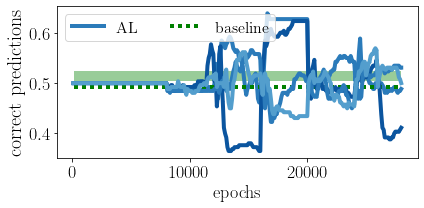

In [3]:
samples = pd.read_csv(folder + "/Training_data/HeisenbergModel/250samples/query_by_amplitude_and_phase/baseline/samples.txt")
num_samples = str(len(samples))
bases = pd.read_csv(folder + "/Training_data/HeisenbergModel/250samples/query_by_amplitude_and_phase/baseline/bases.txt")
num_bases = str(len(bases)+1)
print(num_samples)
print(num_bases)

fig, ax= plt.subplots(1,1,figsize=(6,3), sharex=True)
quantity = "Marshall Sign"

print(np.mean(data[quantity].iloc[-1:,1:], axis=1))
print(np.std(data[quantity].iloc[-1:,1:], axis=1))

#baseline values
bl_value1 = []
bl_value2=[]
for i in (list(data[quantity].columns)):
    bl_value1.append(bl_data[quantity].iloc[-1, :][i])
print(bl_value1[1:])
for RBM in enumerate(list(data[quantity].columns)[1:]):
    x = (data[quantity][RBM[1]].index+1)*100
    if RBM[0] == 0:
        ax.plot(x, ([item for item in data[quantity][RBM[1]]]), "-o", linewidth=4, markersize = 1, color = scalarMap.to_rgba(values[int(RBM[1])+2]), label = "AL")
        ax.plot(x, ([np.mean(bl_value1[1:]) for item in x]), "-o", linewidth=4, markersize = 0, color = "green", label = "baseline", linestyle= (0,(1,1)))
        ax.fill_between(x,[max(bl_value1[1:]) for item in x], [1-min(bl_value1[1:]) for item in x],facecolor = "green", alpha=0.4)
    else:
        ax.plot(x, ([item for item in data[quantity][RBM[1]]]), "-o", linewidth=4, markersize = 1, color = scalarMap.to_rgba(values[int(RBM[1])]))
ax.legend(loc="upper left", fontsize=16, ncol=2)
ax.set_ylabel(r"correct predictions", fontsize=20)
ax.set_xlabel("epochs", fontsize=18)

#plt.ylim(0,1.1)
plt.tight_layout()
plt.subplots_adjust(hspace=0)
#plt.xticks([100, 1000, 2000, 3000, 5000])

plt.savefig(folder+"Marshall.pdf", dpi=1000)
plt.show()

          0      1       2       3
279 -1.1865 -1.146 -1.1595 -1.2145
            0         1         2         3
279 -0.724945 -0.745465 -0.642241 -0.619007


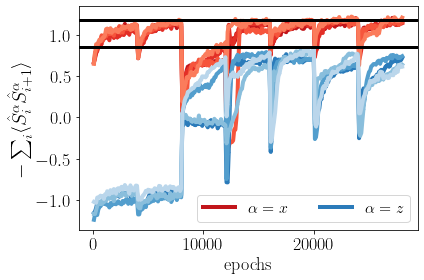

In [4]:
fig, ax= plt.subplots(1,1,figsize=(6,4), sharex=True)


for quantity in ["SxSx", "SzSz"]:
    #baseline values
    bl_value1 = []
    bl_value2=[]
    if quantity == "SxSx":
        label = r"$\alpha=x$"
    elif quantity == "SzSz":
        label = r"$\alpha=z$"
    for i in (list(data[quantity].columns)):
        bl_value1.append(bl_data[quantity].iloc[-1, :][i])
    print((data[quantity].iloc[-1:,1:]))
    for RBM in enumerate(list(data[quantity].columns)[1:]):
        x = (data[quantity][RBM[1]].index+1)*100
        if quantity == "SxSx":
            col = scalarMap_r.to_rgba(values[int(RBM[1])+2])
        elif quantity == "SySy":
            col = scalarMap_g.to_rgba(values[int(RBM[1])+2])
        elif quantity == "SzSz":
            col = scalarMap.to_rgba(values[int(RBM[1])+2])
        if RBM[0]==0:
            ax.plot(x, ([-item for item in data[quantity][RBM[1]]]), "-o", linewidth=4, markersize = 1, color = col, label = label)
        else:
            ax.plot(x, ([-item for item in data[quantity][RBM[1]]]), "-o", linewidth=4, markersize = 1, color = col)
ax.legend(loc="lower right", fontsize=16, ncol=3)
ax.set_ylabel(r"$-\sum_i \langle \hat{S}_i^\alpha \hat{S}_{i+1}^\alpha \rangle $", fontsize=20)
ax.set_xlabel("epochs", fontsize=18)

target_sxsx = np.sum(pd.read_csv(folder + "/target_sxsx.txt").to_numpy())+pd.read_csv(folder + "/target_sxsx.txt").to_numpy()[-1]
target_szsz = np.sum(pd.read_csv(folder + "/target_szsz.txt").to_numpy())+pd.read_csv(folder + "/target_szsz.txt").to_numpy()[-1]
plt.axhline(y=-target_sxsx, color = "black")
plt.axhline(y=-target_szsz, color = "black")
plt.tight_layout()
plt.subplots_adjust(hspace=0)
#plt.xticks([100, 1000, 2000, 3000, 5000])

plt.savefig(folder+"SiSj.pdf", dpi=1000)
plt.show()

In [5]:
print(target_szsz)
print(target_sxsx)

[-1.12497753]
[-1.12497753]


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


39   -0.8235
dtype: float64
39    0.037766
dtype: float64
[-0.5481838973162736, -0.5753279862634275, -0.2607564070597953, -0.1413384921283631]
[-0.5048707526250457, -0.4383720157300543, -0.1470724621151192, -0.1831792136253743]
[-0.8230000000000001, -0.8550000000000001, -0.854, -0.762]


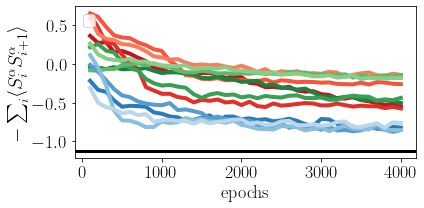

In [6]:
fig, ax= plt.subplots(1,1,figsize=(6,3), sharex=True)


print(np.mean(bl_data[quantity].iloc[-1:,1:], axis=1))
print(np.std(bl_data[quantity].iloc[-1:,1:], axis=1))

for quantity in ["SxSx", "SySy", "SzSz"]:
    #baseline values
    bl_value1 = []
    bl_value2=[]
    for i in (list(data[quantity].columns)):
        bl_value1.append(bl_data[quantity].iloc[-1, :][i])
    print(bl_value1[1:])
    for RBM in enumerate(list(data[quantity].columns)[1:]):
        x = (bl_data[quantity][RBM[1]].index+1)*100
        if quantity == "SxSx":
            col = scalarMap_r.to_rgba(values[int(RBM[1])+2])
        elif quantity == "SySy":
            col = scalarMap_g.to_rgba(values[int(RBM[1])+2])
        elif quantity == "SzSz":
            col = scalarMap.to_rgba(values[int(RBM[1])+2])
        ax.plot(x, ([item for item in bl_data[quantity][RBM[1]]]), "-o", linewidth=4, markersize = 1, color = col)
    ax.legend(loc="upper left", fontsize=16, ncol=2)
    ax.set_ylabel(r"$-\sum_i \langle S_i^\alpha S_{i+1}^\alpha \rangle $", fontsize=20)
    ax.set_xlabel("epochs", fontsize=18)
plt.axhline(y=target_sxsx, color = "black")
plt.axhline(y=target_szsz, color = "black")
plt.tight_layout()
plt.subplots_adjust(hspace=0)
#plt.xticks([100, 1000])

plt.savefig(folder+"baseline_SxyzSxyz.pdf", dpi=1000)
plt.show()